# Hayden's intro to pytest

## Goals
- Understand how to use `pytest` to run automated tests of your code
- Understand where your test suite should be stored in a package directory structure
- Understand the difference between unit and end-to-end tests, and where/how to use each
- Understand the basic functionality of `pytest` and know where to find additonal information
- Understand testing best-practices

This notebook gives a very surface-level intoduction to code testing in python with `pytest`. 

A quick note on dependencies: If you installed `pytest-tutorial`, `pip` should take care of everything for you. Aside from `numpy` and `matplotlib`, we'll of course need `pytest` itself, along with extensions called `pytest-mock` and `pytest-cov`. `ipytest` will allow pytest to work in a notebook such as this one. 

As always, I also strongly reccommend having a look through the [pytest documentation](https://docs.pytest.org/en/stable/).

You may also have heard of / run into `unittest`, which is python's built-in testing module. There's nothing wrong with `unittest`, though `pytest` is widely regarded to be more powerful, so these days it's usually preferred over `unittest`.

In [1]:
import numpy as np
import pytest
# importing ipytest so we can use pytest functionality within a notebook.
import ipytest
ipytest.autoconfig() # setup

## The basics of testing

Most if not all people who write code test it by using the code and verifying it produces expected results. However, manual testing of code has limitations - you have to remeber to do it, it's hard to reproduce, and it's time-consuming. Test suites solve these problems by including code whose only purpose is to test the actual application code. 

Making test suites for your code is not something that's usually taught in astronomy, but it's very very useful and important! Here are just a few reasons why it's good to have tests in your code:

- More confidence in your code for both yourself and your users
- Your code is easier to change and maintain, as your test suite can tell you if the changes you've made break anything
- You can be confident that adding new features to your code doesn't break backwards-compatibility
- You can catch bugs early
- Your tests will let you know if updating python / packages / your environment / etc breaks any functionality in your code
- Writing tests helps you write better code - easier-to-test code is better code!
- Tests serve as living, working documentation

There are two major types of tests that every test suite should contain:
1. Unit tests
	- Small, self-contained tests that are designed to test *at most* a single function or method. Every unique function or method in your code should be covered by at least one unit test. The goal of unit testing is to make sure each individual part of your code works correctly *in isolation*.

2. End-to-end (E2E) tests, sometimes also called functional tests
	- Tests designed to emulate a common workflow using your code, these tests ensure the pieces of your code work together as they're intended. These should test multiple parts of your code (ideally the whole thing, from *end-to-end*) in a scenario that emulates real-world usage as much as possible. Typically, these tests revolve around *user stories*, which are narratives that describe how a user might interact with the code.

You might also have integration tests, an intermediate step between unit and E2E tests, designed to test how your code integrates with some external dependency. 

Each test should follow these four steps:
1. **Arrange**: set up the context for the test, including environment, databases, objects, starting / killing services, etc. 
2. **Act**: run the *minimal part* of code that the test is designed to test, usually a function or method call. For a unit test, you should try to make this a single line of code.
3. **Assert**: assertion statements that check the outcome of the Act against an expected outcome. 
4. **Cleanup**: any cleanup that needs to be done to ensure that the test does not leave any permanent state changes or conflict with other tests. 

## The basics of pytest

`pytest` is a package for running and reporting the results of Python code tests. When you run pytest (on a command-line, simply run `$ pytest`), it works by first doing "test collection," that is searching for tests in the directory the command was executed from. By default, it will look for files (and functions within those files) that start with `test*` within the package and any modules below where it was executed. A common package structure is 

```
Package-name/
	docs/
	src/
		__init__.py
		source_file1.py
		source_file2.py
	tests/
		test_my_code.py
	README.md
	pyproject.toml
	LICENSE.md
```

In this package structure, tests are kept within a dedicated tests module/directory, on the same level as the source code, documentation, etc. 

In this example, pytest would be run with `$ pytest`. 

It will then look inside your package for files that begin with `test`. It will find the file `test_my_code.py`, and execute any functions within that file that also begin with `test`. 

Note that you can configure pytest by including a section in your `pyproject.toml` file with the header `[tool.pytest.ini_options]`. See [this page](https://docs.pytest.org/en/stable/reference/customize.html) for more info. 

You can also have pytest run only specifc test files, directories, or even individual tests by specifying the desired paths on the command-line. There's a ton of useful options as well, I'll let you explore these yourself with `$ pytest --help` or by looking through the manual page. 

So, what does a test function look like? It contains normal python code (that you want to test), follwed by `assert` statements that test some condition that you want to be true if the test passes. For example, let's make a simple function that adds two numbers:

In [2]:
def add(a, b):
	"""Adds two numbers

	Parameters
	----------
	a : float or int
		First number to be added
	b : float or int
		Second number to be added

	Returns
	-------
	float 
		sum of arguments
	"""
	return a + b

Now, let's use pytest to make sure this function does what we want it to! I'll write a unit test function for `add()` below. The `%%ipytest` at the top of the cell tells jupyter to run the cell as if pytest's test collection found a test file with the same contents as the cell. The `-qq` tells `ipytest` to ignore any tests we've created in other cells.

A few things to keep in mind as you write tests:
- Your tests serve as documentation - someone reading only your tests should know what the code being tested is designed to do without looking at the source code! The names of your tests should read as a sentence describing what the code being tested should do. 
- Unit tests should be as isolated as possible. If you need to use a third of your source code to do setup for a unit test, this is a sign your code is too tightly coupled.
- Tests should test behavior (*what* the code is doing) rather than implementation (*how* the code is doing it). This allows you to keep using your tests as a guardrail while you refactor. 

A quick documentation note: I'm using a TON of comments in this notebook to explain how things work. When we practice at the end, I'll switch back to best-practices. 

In [3]:
%%ipytest -qq 
# this lets ipytest know we want to execute this cell as if pytest found it during test collection

def test_add_returns_sum_of_arguments(): # descriptive test name that refers to the function it's testing
	out = add(2., 2.) # the test first executes the function it's designed to test
	assert out == 4. # and then uses an assert statement to compare that output against what's expected. 

.                                                                                            [100%]


Great, our function can add 2+2 correctly, as indicated by the green "pass" dot! Just for the sake of example, let's see what happens if the test fails:

In [24]:
%%ipytest -qq

def test_add_returns_sum_of_arguments():
	out = add(2., 2.)
	assert out == 5. # wrong answer! 

F                                                                                            [100%]
============================================= FAILURES =============================================
________________________________ test_add_returns_sum_of_arguments _________________________________

    def test_add_returns_sum_of_arguments():
    	out = add(2., 2.)
>   	assert out == 5. # wrong answer!
E    assert 4.0 == 5.0

/var/folders/lc/xd976z7s6cq26wc5y88rxm_00000gn/T/ipykernel_43013/4070306485.py:3: AssertionError
===================================== short test summary info ======================================
FAILED t_01ccd42472804df5ab72da09830f80cf.py::test_add_returns_sum_of_arguments - assert 4.0 == 5.0


On failure (indicated by a red F), pytest will give you the full traceback, telling you the exact assertion that failed, followed by a summary of any failures in your test suite. This can be handy if you have multiple failures - you can see at a glance which tests failed and why, without scrolling all the way through multiple tracebacks.

## Expected failures 

- mention this, but take it out in favor of the proper error handling

Sometimes, it's useful to write a test that you know *should* fail, and then check that it actually does. This is called an *expected failure*. 

This is the first time we'll see an example of a pytest *mark*, which are decorators that tell pytest a test function should have some special behavior. For more info on marks, see [this page](https://docs.pytest.org/en/stable/how-to/mark.html). 

Here's the same test we ran above, but we'll use the `pytest.mark.xfail` mark to tell pytest we expect the test to fail:

In [ ]:
%%ipytest -qq

# we expect this test to fail!
@pytest.mark.xfail 
def test_add_fails_with_invalid_input():
	out = add(2., "foo")

x                                                                                            [100%]


Note that expected failures don't show up as passes - they have their own category!

In this case though, it's better to write a test for proper error handling rather than an expected failure. Pytest includes a function called `raises()` that verifies a particular error is raised for just this purpose. For instance:

In [ ]:
%%ipytest -qq

def test_add_throws_typeerror_on_invalid_input():
	with pytest.raises(TypeError) as error:
		out = add(2., "foo") 

	assert error.type == TypeError # even though I specified an error type in the context manager, we still need to test this explicitly
	assert "unsupported operand type(s) for +: 'float' and 'str'" in str(error.value) # we also check that the error message itself is correct

.                                                                                            [100%]


## Parametrizing tests
So far everything is going as expected, but all we *really* know for sure is that our function can add 2+2 correctly, and crashes correctly if one of the arguments is a string. What about testing other sums, especially edge cases that can sometimes cause numerical problems? 

Luckily, there's a way to run a test multiple times with multiple sets of arguments. I'll also show you how to bake-in expected failures.

In [ ]:
%%ipytest -qq

# to use the parametrize mark, we need to define three variables in a string that represent the two inputs and the single output
# of the function we're testing, then pass a list of tuples corresponding to the values of those variables for each execution. 

# If we want to use a mark during some parameter combos but not others, we can pass a pytest
# param object instead of a tuple for those cases, which allows setting marks. 

# Here, we'll use our original test, then make sure our function can handle negative numbers, 
# pass something we expect to fail along with an xfail mark, and finally see what happens
# when we add 1 to the maximum int in python (2^(64-1) according to sys.maxint)
@pytest.mark.parametrize("in1,in2,out", 
							[
								(2., 2., 4.), 
								(-2, 2, 0), 
								pytest.param(4, 3, -50, marks=pytest.mark.xfail), 
								(9223372036854775807, 1, 9223372036854775808)
							]
						) 
# then, we pass the variables we defined in the mark to the test function:
def test_add_returns_sum_of_arguments_parametrized(in1, in2, out): 
	assert out == add(in1, in2)

..x.                                                                                         [100%]


Note that pytest executes four separate tests here - one for each parameter combo we passed! Pytest won't stop in the event of a failure, it will test every parameter combo regardless of what happens to the other tests. 

Luckily, python has a `longint` type that it automatically switches `int`s to when they overflow, so the last test came out as expected instead of wrapping back to 0, and the only test that failed is the one we expected.

## Fixtures

*Fixtures* are pytest's method of handling the Arrange and Cleanup phases of a test. To define a fixture, we'll use another mark. Be sure that your fixture names do NOT include `test`, as we don't want pytest to collect fixtures themselves as tests. To use a fixture, you'll pass the name of the fixture to your test functions as an argument. 

Fixtures are built around the `yield` statement, which acts like `return`. When a fixture is passed to a test, the test will execute the fixture once the line referencing it is reached. All of the code in the fixture before the `yield` statement is run, before returning whatever is next to the `yield`. After the test is completed, the code after the `yield` statement is run, allowing for cleanup. 

Note that if you want to define a fixture that doesn't need cleanup, you can use `return`, which works as you'd expect. 

Here, we'll define a very simple file reader function, and then test it using a fixture to help:

In [25]:
def file_reader(file_name):
	"""file_reader stores the lines of a text file in a list

	Parameters
	----------
	file_name : str
		name of the file
	
	Returns
	-------
	list of str
		a list whose elements are the lines of the file
	"""

	with open(file_name, 'r') as f:
		lines = [line for line in f]

	return lines

To test this file reader, we don't want to include a file with our package to run the test against - 
it would be much easier if we could create a file, use it to test our function, and then delete it 
automatically. With pytest fixtures, this is really easy:

In [26]:
%%ipytest -qq

import os

LINE_1 = "This is the first line!\n"
LINE_2 = "This is the second line!\n"
FILE_TEXT = LINE_1 + LINE_2
FILE_NAME = "example_file.txt"

# here, we define a file fixture that will set up and clean up a test file for us
@pytest.fixture
def example_file():
	# first, we make the temporary test file
	with open(FILE_NAME, 'w') as f:
		f.write(FILE_TEXT)

	# then yield the file name so our test can see it
	yield FILE_NAME

	## 4. CLEANUP
	# after the test is run, this will delete the file
	os.remove(FILE_NAME)

# now, in our test, we'll pass in the fixture, which acts like the object it returns, 
# i.e. here example_file is equivalent to the string it returns, which means we don't
# call it by adding (). 
def test_file_reader_returns_a_list_of_file_lines(example_file):
	## 1. ARRANGE
	# this line will run the fixture. Again, example_file acts like what's in the 
	# yield statement - the name of the example file. 
	file_name = example_file 

	## 2. ACT
	out_lines = file_reader(file_name) 

	## 3. ASSERT
	assert type(out_lines) == list
	assert len(out_lines) == 2
	assert out_lines[0] == LINE_1
	assert out_lines[1] == LINE_2

.                                                                                            [100%]


Our test passes as expected, without leaving behind the example file in our directory system! Fixtures are *super* powerful, and this example barely scratches the surface of what you can do with them. Again, I highly recommend reading through the [documentation](https://docs.pytest.org/en/stable/explanation/fixtures.html)!

## Mocking

When your code makes use of an external package, you can safely assume that package is already well-tested by its devs and you don't need to write a test that checks the external package is working correctly. However, it is useful to test that your code is calling the external functions/methods correctly and is capturing the correct output from those calls. In this situation, we can make use of *mocks*, which essentially simulate an external function in your testing environment. 

In python, mocking is performed with `unittest`'s `mock` library. `mock` uses Python's ability to assign functions and objects to variables to replace or *patch* the real external function with a *mock* function that will take any arguments and return anything we want it to. 

Mocked functions also have methods that allow you to set what you want a mocked function to return, and test if and with what arguments they were called. Let's look at the behavior of a Mock object:

In [10]:
from unittest.mock import Mock

mock_fn = Mock() # a "blank" mock object 
print(type(mock_fn))

<class 'unittest.mock.Mock'>


In [11]:
# this acts as a function that takes any argument we give it.
mock_fn(5)

# and we can verify the arguments it was last called with:
mock_fn.assert_called_with(5)

mock_fn('foo', some_kwarg=7)
mock_fn.assert_called_with('foo', some_kwarg=7)

mock_fn.assert_called_with('bar') # only this last assertion should fail. 

AssertionError: expected call not found.
Expected: mock('bar')
Actual: mock('foo', some_kwarg=7)

In [12]:
# we can also check if the mock has been called only once
mock_fn.assert_called_once() # should fail

AssertionError: Expected 'mock' to have been called once. Called 2 times.
Calls: [call(5), call('foo', some_kwarg=7)].

In [13]:
# or only once with a specific set of arguments
mock_another_fn = Mock()
mock_another_fn(2)

mock_another_fn.assert_called_once_with(2)

In [14]:
# We can also access the arguments from any of the past calls
print(mock_fn.call_args_list)
print()
# or just the most recent call
print(mock_fn.call_args)

[call(5), call('foo', some_kwarg=7)]

call('foo', some_kwarg=7)


In [15]:
# We can also tell the mock to return a specific value regardless of how it's called:
mock_fn.return_value = 'return'
print(mock_fn('foo'))
print(mock_fn(5))

return
return


Again, this is just scratching the surface of what's possible with mocks, I highly encourage you to poke around the [mock documentation](https://docs.python.org/3/library/unittest.mock.html#)! Mock objedts can be especially useful for testing external dependencies or other (well-tested!) parts of our code while keeping our unit tests isolated. 

For example, let's say we want to test a function that wraps some matplotlib code to make a plot easier to replicate / reproduce. We don't want to test `plt.plot` itself, as we can assume the matplotlib developers have ensured it works correctly with their own tests. However, we can and should test that our code is calling `plt.plot` the way we want it to - if the call is correct, we can assume the plot will be too! 

We'll start with the function we want to test:

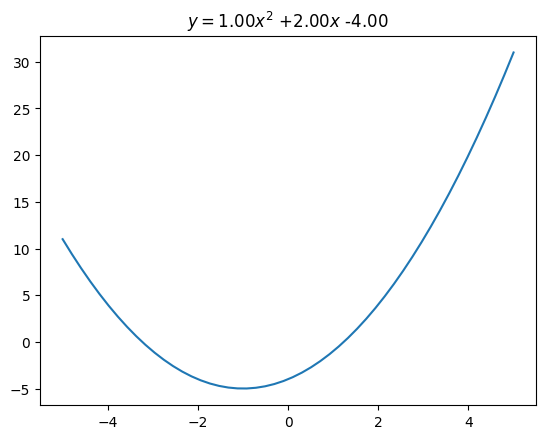

In [16]:
import matplotlib.pyplot as plt

def plot_quadratic(x, a=1., b=0., c=0.):
	"""
	Plots a quadratic equation

	Parameters
	----------
	x : np.ndarray
		1-D array with x-values sampling the function over the desired domain
	a : float, optional
		coefficient of the x^2 term, default 1.
	b : float, optional
		coefficient of the x term, default 0.
	c : float, optional
		constant, default 0.
	"""
	
	y = a * x**2. + b * x + c

	plt.plot(x, y)
	plt.title(f"$y=${a:.2f}$x^2$ {b:+.2f}$x$ {c:+.2f}")
	plt.show()

plot_quadratic(np.linspace(-5, 5, 50), a=1., b=2., c=-4.)

Now let's write a test for this function. To patch a function in pytest, we use a fixture called `mocker` from the package `pytest-mock`, which wraps `unittest.mock` in a fixture to make it more easily usable with pytest. For more info, see the [mock documentation](https://docs.python.org/3/library/unittest.mock.html#) and the [pytest-mock documentation](https://pytest-mock.readthedocs.io/en/latest/usage.html).

The trick is to ensure the mocking happens in the correct namespace and in the correct order. In this case, we want calls to `plt.plot()` to use the mocked version only within our test, and to use the real matplotlib version everywhere else. Therefore, we do our patching inside the test function during the setup phase. 

In [28]:
%%ipytest -qq
from matplotlib import pyplot # you need to import anything you're mocking into your test script

def test_plot_quadratic_uses_matplotlib_calls_correctly(mocker):
	# we use the mocker fixture to replace plt.plot(), plt.title(), and plt.show() with Mocks for the duration of the test.
	# Note that:
	# 1. you need to specify the entire path to what you're mocking!
	# 2. It's common practice to patch things in the REVERSE order in which they're used, 
	# which is a holdover from how the unittest module handles mocking.
	mock_show = mocker.patch("matplotlib.pyplot.show")
	mock_title = mocker.patch("matplotlib.pyplot.title")
	mock_plot = mocker.patch("matplotlib.pyplot.plot") 

	x = np.linspace(-1, 1, 20)
	plot_quadratic(x, a=1., b=0., c=0.)
	
	arg1, arg2 = mock_plot.call_args[0] # in order to compare arrays we need to access them first

	assert np.allclose(x, arg1)
	assert np.allclose(x**2, arg2)

	mock_title.assert_called_once_with("$y=$1.00$x^2$ +0.00$x$ +0.00")
	mock_show.assert_called_once()


.                                                                                            [100%]


We've ensured our function is using matplotlib the way we intend, without actually using matplotlib at all. Notice we didn't actually get a plot when we ran the test. Neat! 

Beyond testing external code, mocks can also be used to keep tests of your own code isolated. 

### Some words of caution on mocking

- Mocks go agaist the rule that tests should test behavior over implementation, as they tie you to a very specific implementation. However, sometimes they're a necessary evil to avoid duplication or running an expensive external library for real. This takes some good judgement to balance.

- It's easy to mess up a mocky test such that it doesn't test what you intended. For example, if you misspell one of the built-in Mock() methods, the test won't complain because *any* method will work. It's worth taking a bit of extra care when writing mocky tests.

# Test-Driven Development (TDD) and End-to-End (E2E) Tests

TDD refers to the practice of writing tests *before* the code they're designed to test. It's great to ensure good test coverage, make sure the code is actually doing what it should do, and for helping with good design. 

Here'a a few diagrams to explain the workflow. The first one describes the workflow for a single function and its unit tests:

![Double-loop TDD](./static/TDD_loop.png)

To ensure different pieces of code work together as intended, we use E2E tests to test typical workflows. These are the authoritative check on whether your entire application/package works as intended. 

These tests typically revolve around "user stories," in which you imagine a typical use-case for your code, then use the test to execute and verify that use-case. With an E2E test, here's the TDD cycle for an entire feature. 

![Feature testing cycle](./static/FT_loop.png)

Image credits: Harry Percival, *Obey the Testing Goat* [https://www.obeythetestinggoat.com/book/chapter_04_philosophy_and_refactoring.html#simple-tdd-diagram](https://www.obeythetestinggoat.com/book/chapter_04_philosophy_and_refactoring.html#simple-tdd-diagram)

## Practice

Let's mob-program a TDD cycle for a sine function object. I'll provide the E2E test and we'll go from there. Notice that by starting with the E2E test, I've used a user story describing the desired user experience to drive the design of my code - I already know what methods to write, what arguments they should take, and what they need to return! 

In [20]:
%%ipytest -qq
## E2E Test
import matplotlib

# constants to specify the sine curve
AMP = 2.
FREQ = 2.
PHASE = -np.pi
TOL = 1e-10 # some small error tolerance to deal with floating-point math

def test_sin_class_functionality(mocker):
	# here, we know the user will want to plot the sine function, 
	# so we mock out the dependency on matplotlib again.
	mock_plot = mocker.patch("matplotlib.pyplot.plot")
	mock_plot.return_value = [matplotlib.lines.Line2D(xdata=[], ydata=[])] # we can assume plt.plot() returns a list of Line2D objects

	# A user wants to explore the behavior of a sine function. They define a sin curve, 
	sine = sinFunction(AMP, FREQ, PHASE)

	# and check that the value at x=0 is what they expect.
	assert np.abs(sine(0)) < TOL

	# Next, they extract the period of the sin curve,
	per = sine.get_period()

	# and check that the function has the same value after one period
	assert np.abs(sine(per)) < TOL 
	# and one half period
	assert np.abs(sine(per/2.)) < TOL 

	# finally, they plot the curve over two periods,  
	sin_plot = sine.plot(domain=[0, 2.*sine.get_period()])
	
	# and notice that they have been given the matplotlib Line2D object to modify if they choose. 
	assert type(sin_plot[0]) == matplotlib.lines.Line2D


.                                                                                            [100%]


In [ ]:
%%ipytest -qq
## Unit tests
import matplotlib

@pytest.fixture
def sine_object():
	return sinFunction(AMP, FREQ, PHASE)

def test_sineFunction_attributes_are_assigned(sine_object):
	assert sine_object.amplitude == AMP
	assert sine_object.frequency == FREQ
	assert sine_object.phase == PHASE

def test_sineFunction_returns_evaluation_when_called(sine_object):
	assert sine_object(-PHASE) < TOL
	assert (sine_object(np.pi - PHASE) - 1.) < TOL
	assert type(sine_object(0)) == np.float64

def test_sineFunction_calculates_period_correctly(sine_object):
	period = sine_object.get_period()
	assert (period - np.pi) < TOL # pi is the expected answer for a frequency of 2
	assert type(period) == np.float64

def test_sineFunction_plot_returns_matplotlib_line_list(mocker, sine_object):
	mock_plot = mocker.patch("matplotlib.pyplot.plot")
	mock_plot.return_value = [matplotlib.lines.Line2D(xdata=[], ydata=[])]

	lines = sine_object.plot()
	assert type(lines) == list
	assert type(lines[0]) == matplotlib.lines.Line2D

def test_sineFunction_plot_calls_plot_correctly(mocker, sine_object):
	mock_plot = mocker.patch("matplotlib.pyplot.plot")

	low_bound = 0
	high_bound = 1
	sine_object.plot(domain=[low_bound, high_bound])
	
	x, y = mock_plot.call_args[0]
	assert np.allclose(x, np.linspace(low_bound, high_bound, 500))
	assert np.allclose(y, sine_object(x))


.....                                                                                        [100%]


In [18]:
## Application code
import matplotlib.pyplot as plt

class sinFunction:
	def __init__(self, amplitude, frequency, phase):
		
		self.amplitude = amplitude 
		self.frequency = frequency
		self.phase = phase

	def __call__(self, x):
		return self.amplitude * np.sin(self.frequency * x - self.phase)
	
	def get_period(self):
		return 2*np.pi / np.abs(self.frequency)

	def plot(self, domain=[1, 2*np.pi]):
		x = np.linspace(domain[0], domain[1], 500)
		lines = plt.plot(x, self(x))
		return lines

## Listening to your tests

Beyond just telling you if your code is working as intended, tests are also useful for driving good design. However, they won't explicitly catch this, and your code is only as good as your tests are. To make your tests do their best work, you need to listen to more than just the output of your test runs. For example:

- If your unit tests take more than a few seconds to run, they're probably doing too much, not isolated enough, and/or your code is too tightly coupled. 
- If you need to run more than a line or two of your code to set up for a unit test, your code is probably too tightly coupled. 
- If your tests are ugly, your code probably is too. Time for a refactor! 

## Test coverage

It's a good idea to check your test coverage (what percentage of your application code your test suite actually executes) periodically, and to keep it as high as possible. 

If you `$ pip install pytest-cov`, you can add `--cov` to the end of your pytest runs to have pytest check your coverage for you!

## Be pragmatic

As mentioned in the reading, testing, like anything else, can be overdone. Yes, passing tests and good coverage are important, but you need to balance this with practical considerations. It's possible to get too bogged down in writing tests and not end up with much actual code. Your end-to-end tests should keep track of the bigger picture as much as possible so that at the end of the day, the code actually does what it needs to do. Always shoot for 100% coverage, but note that is not always realistic - it might be a better use of your time to focus on that other feature rather than spending a whole day writing mocks for that last test you need for 100% coverage. 

## Resources

That's a very quick rundown of the basics of testing! Obviously, testing is a *very* deep subject and pytest is much more powerful than I've demonstrated here. Please read the pytest docs and look through the linked resources, try different things, and ask questions if you have them!

Some more resources on testing in general:
- [Jo Bovy's python packaging guide](https://pythonpackaging.info/05-Tests.html)
- [Realpython's pytest guide](https://realpython.com/pytest-python-testing/)
- [A Beginner's Guide to Unit Testing with pytest](https://betterstack.com/community/guides/testing/pytest-guide/)
- [Obey the Testing Goat - Harry Percival's **excellent** book about test-driven development in Python](https://www.obeythetestinggoat.com/)